In [ ]:
# Satellite Imagery-Based Property Valuation

## Objective
The objective of this project is to build a multimodal regression model
to predict property prices using tabular features and satellite imagery.

This notebook focuses on **exploratory data analysis (EDA)** and
**tabular data preprocessing**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datasets
train_df = pd.read_excel("train(1).xlsx")
test_df = pd.read_excel("test2.xlsx")

train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
# Data shape
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (16209, 21)
Test shape: (5404, 20)


In [5]:
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


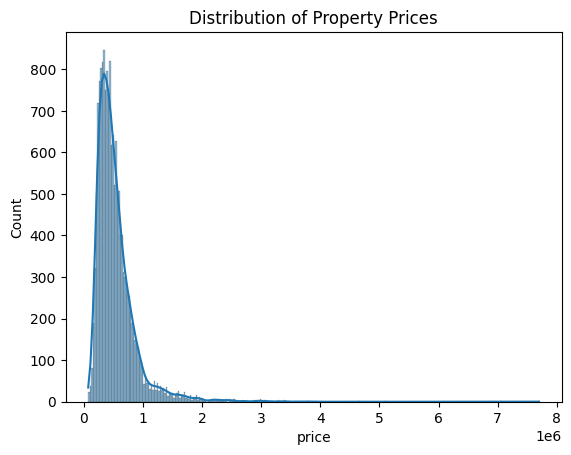

In [6]:
# PRICE DISTRIBUTION
plt.figure()
sns.histplot(train_df['price'], kde=True)
plt.title("Distribution of Property Prices")
plt.show()

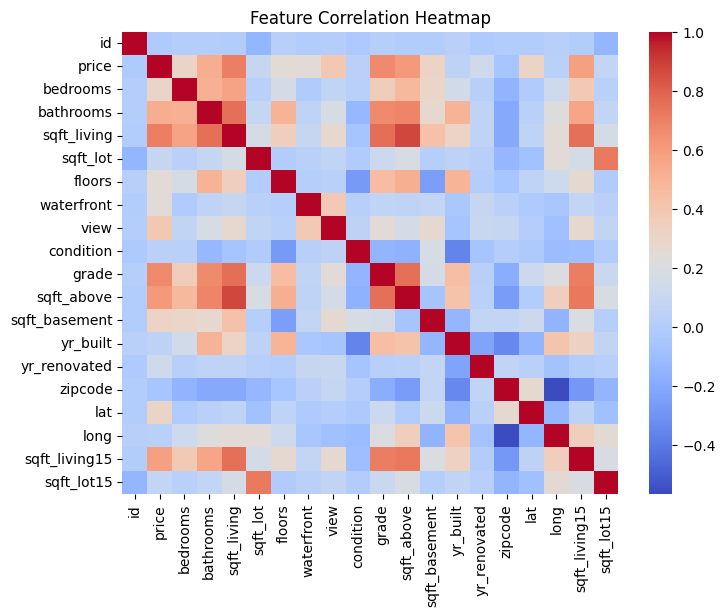

In [7]:
numeric_df = train_df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

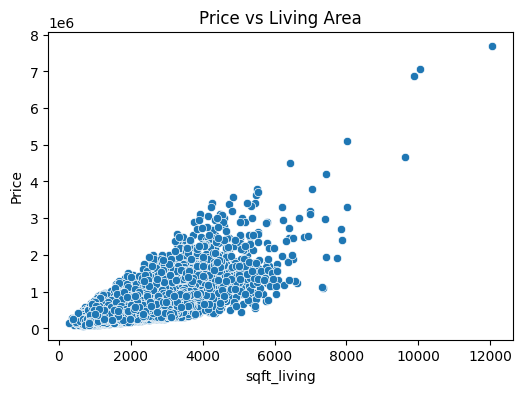

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=train_df['sqft_living'], y=train_df['price'])
plt.title("Price vs Living Area")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.show()

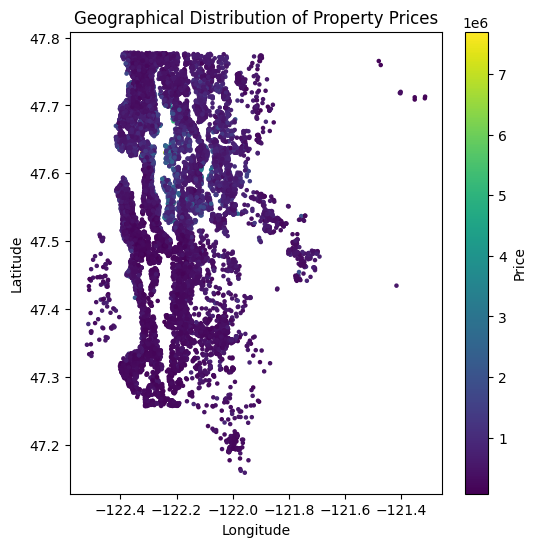

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(
    train_df['long'],
    train_df['lat'],
    c=train_df['price'],
    cmap='viridis',
    s=5
)
plt.colorbar(label='Price')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Property Prices")
plt.show()

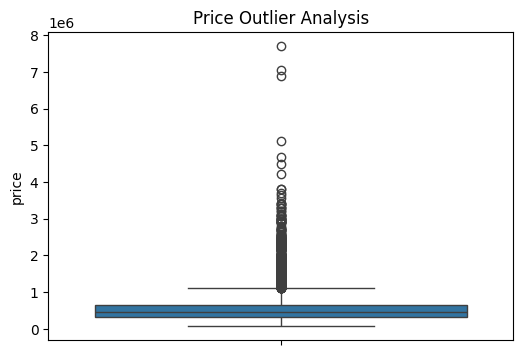

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(y=train_df['price'])
plt.title("Price Outlier Analysis")
plt.show()

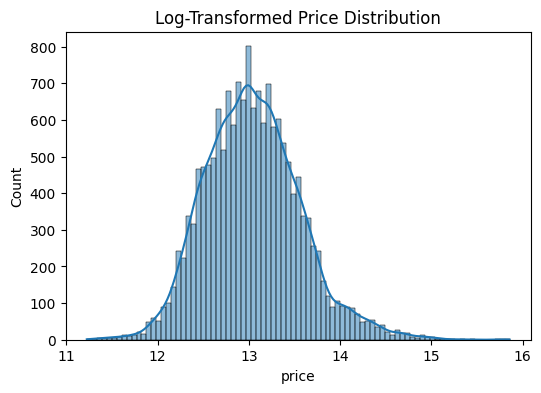

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(train_df['price']), kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

In [12]:
# missing values
train_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long']

X = train_df[features]
y = train_df['price']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
np.save("X_tabular.npy", X_scaled)
np.save("y.npy", y.values)

In [16]:
print("Final feature shape:", X_scaled.shape)
pd.DataFrame(X_scaled, columns=features).head()

Final feature shape: (16209, 5)


,bedrooms,bathrooms,sqft_living,lat,long
0,0.677402,0.178963,-0.290276,-0.900034,0.192759
1,-0.394132,0.505667,-0.521813,-1.137139,0.192759
2,0.677402,0.505667,-0.389506,-2.098571,-0.706669
3,-1.465666,0.178963,-0.918734,-0.206791,1.006527
4,-0.394132,-0.147741,-0.874632,-1.367738,0.999388


In [19]:
import pandas as pd
import os
import time
from data_fetcher import fetch_satellite_image

# CONFIG
MAPBOX_TOKEN = "pk.eyJ1Ijoic2FoaXRoaWdvbGxhIiwiYSI6ImNtazN4em1vMDAxbHEzZHIyeGhxZXdndzIifQ.J8bxnIlzwwc-pf9gE_uxMQ"   
SUBSET_SIZE = 100                    import os
print(len(os.listdir("images/train")))


# LOAD TABULAR DATA
train_df = pd.read_excel("train(1).xlsx")

# ENSURE FOLDER
os.makedirs("images/train", exist_ok=True)

# FETCH IMAGES USING LAT/LONG
for idx, row in train_df.head(SUBSET_SIZE).iterrows():
    lat = row["lat"]
    lon = row["long"]

    save_path = f"images/train/{idx}.png"

    success = fetch_satellite_image(
        lat, lon, save_path, MAPBOX_TOKEN
    )

    if idx % 10 == 0:
        print(f"Fetched image {idx}: {success}")

    time.sleep(0.3)   # VERY IMPORTANT (API safety)


Fetched image 0: True
Fetched image 10: True
Fetched image 20: True
Fetched image 30: True
Fetched image 40: True
Fetched image 50: True
Fetched image 60: True
Fetched image 70: True
Fetched image 80: True
Fetched image 90: True


In [20]:
import os
print(len(os.listdir("images/train")))

100


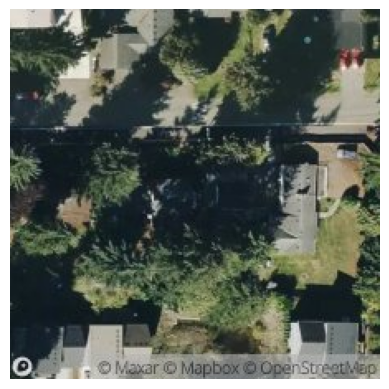

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("images/train/0.png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [27]:
import pandas as pd
import os
import time
from data_fetcher import fetch_satellite_image

MAPBOX_TOKEN = "pk.eyJ1Ijoic2FoaXRoaWdvbGxhIiwiYSI6ImNtazN4em1vMDAxbHEzZHIyeGhxZXdndzIifQ.J8bxnIlzwwc-pf9gE_uxMQ"   

TOTAL_IMAGES = 800
BATCH_SIZE = 100
REQUEST_SLEEP = 0.3
BATCH_SLEEP = 15

train_df = pd.read_excel("train(1).xlsx")

os.makedirs("images/train", exist_ok=True)

for batch_start in range(START_FROM, TOTAL_IMAGES, BATCH_SIZE):
    batch_end = min(batch_start + BATCH_SIZE, TOTAL_IMAGES)

    print(f"\nDownloading batch: {batch_start} → {batch_end}")

    batch_df = train_df.iloc[batch_start:batch_end]

    for idx, row in batch_df.iterrows():
        lat = row["lat"]
        lon = row["long"]
        save_path = f"images/train/{idx}.png"

        fetch_satellite_image(lat, lon, save_path, MAPBOX_TOKEN)
        time.sleep(REQUEST_SLEEP)

    print(f"Batch {batch_start} → {batch_end} completed")
    time.sleep(BATCH_SLEEP)


In [29]:
import pandas as pd
import os
import time
from data_fetcher import fetch_satellite_image


MAPBOX_TOKEN = "pk.eyJ1Ijoic2FoaXRoaWdvbGxhIiwiYSI6ImNtazN4em1vMDAxbHEzZHIyeGhxZXdndzIifQ.J8bxnIlzwwc-pf9gE_uxMQ"

TOTAL_IMAGES = 1200      
BATCH_SIZE = 100
REQUEST_SLEEP = 0.3
BATCH_SLEEP = 15

# Load tabular data
train_df = pd.read_excel("train(1).xlsx")

# Ensure folder exists
os.makedirs("images/train", exist_ok=True)

# 🔹 AUTO-DETECT WHERE TO RESUME
existing_files = [
    int(f.split(".")[0])
    for f in os.listdir("images/train")
    if f.endswith(".png") and f.split(".")[0].isdigit()
]

START_FROM = max(existing_files) + 1 if existing_files else 0
print("Resuming from index:", START_FROM)

# 🔹 BATCH DOWNLOAD LOOP
for batch_start in range(START_FROM, TOTAL_IMAGES, BATCH_SIZE):
    batch_end = min(batch_start + BATCH_SIZE, TOTAL_IMAGES)

    print(f"\nDownloading batch: {batch_start} → {batch_end}")

    batch_df = train_df.iloc[batch_start:batch_end]

    for idx, row in batch_df.iterrows():
        lat = row["lat"]
        lon = row["long"]
        save_path = f"images/train/{idx}.png"

        fetch_satellite_image(lat, lon, save_path, MAPBOX_TOKEN)
        time.sleep(REQUEST_SLEEP)

    print(f"Batch {batch_start} → {batch_end} completed")
    time.sleep(BATCH_SLEEP)


Resuming from index: 1200
